<a href="https://colab.research.google.com/github/LilianeEff/Data201/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Liliane Effoudou
####Project 2
**Pet Adoption Predictor**

This is the Pet Adoption Predictor dataset taken from Kaggle. This dataset combines the different factors that could make it likely for an individual to want to adopt a pet. It contains 2007 rows with different pets such as dogs, cats, rabbits, birds, and 13 columns as various possible predictors.
I'd like to see what makes it easier for owners to adopt pets, what makes those pets desirable?



#####**2**. **Prepage and wrangle your data with Pandas and Numpy.**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df= pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data201/refs/heads/main/pet_adoption_data.csv')
df.head()



,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


#####**3**.**Perform an EDA analysis of the data and visualize it**

In [59]:
df['PetType'].unique() # the pets listed for adoption are birds, dogs, cats, and rabbits.

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [60]:
df.info() # We have 2007 observations(or pets) and 13 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [61]:
df.isnull().sum() #there are no missing values in the dataset.

,0
PetID,0
PetType,0
Breed,0
AgeMonths,0
Color,0
Size,0
WeightKg,0
Vaccinated,0
HealthCondition,0
TimeInShelterDays,0


In [62]:
df.describe() #These are the summary statistics of the dataset.

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [63]:
df=df.drop('PetID', axis=1)
df.head() #I removed the petID column since I didn't think i'd need it.


,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [64]:
df.describe() #new summary statistics without the petID

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


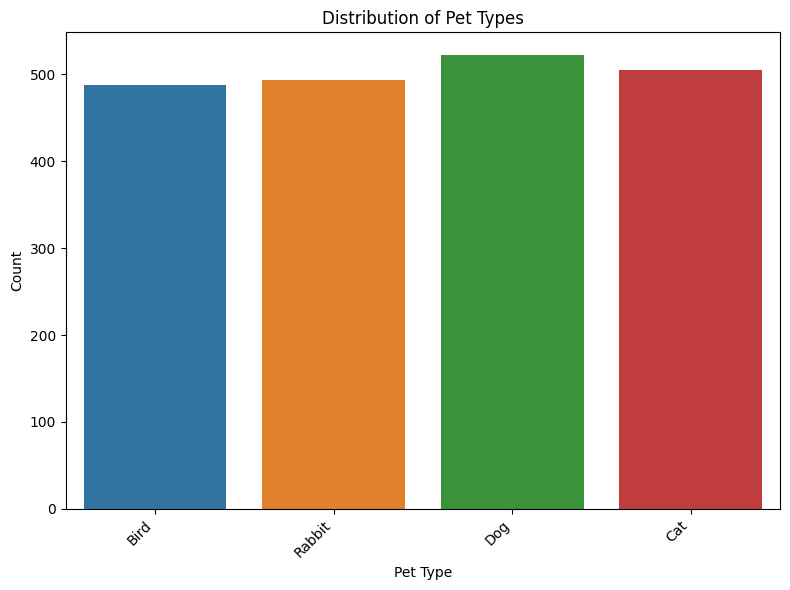

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64
AdoptionLikelihood  PetType
0                   Rabbit     368
                    Cat        360
                    Bird       340
                    Dog        280
1                   Dog        242
                    Bird       147
                    Cat        145
                    Rabbit     125
Name: count, dtype: int64


In [65]:
#Visualizations:
#countplot of the pets that need to be adopted. Although there are more dogs, the distribution is
#not very stark accross the board.
plt.figure(figsize=(8, 6))
sns.countplot(x='PetType', data=df, hue='PetType')
plt.title('Distribution of Pet Types')
plt.xlabel('Pet Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

pet_counts = df['PetType'].value_counts()
print(pet_counts)

adoption_likelihood = df[['AdoptionLikelihood', 'PetType']].value_counts()

print(adoption_likelihood)


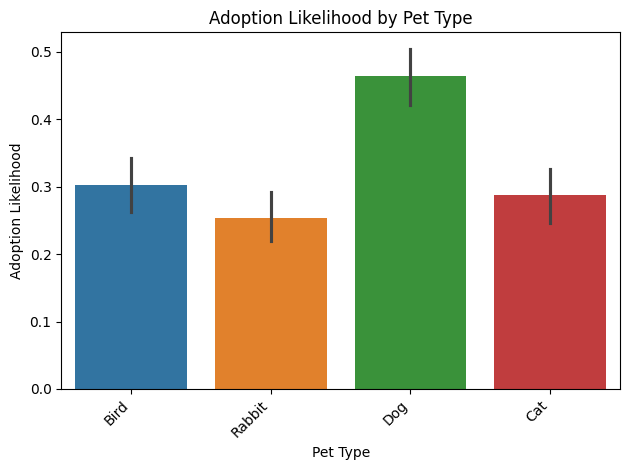

In [66]:
sns.barplot(x='PetType', y='AdoptionLikelihood', data=df, hue='PetType')
plt.title('Adoption Likelihood by Pet Type')
plt.xlabel('Pet Type')
plt.ylabel('Adoption Likelihood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() #Dogs are most likely to be adopted compared to the other pets.

####**4.Use Scikit-learn linear regression to train, test, and predict a numerical target variable. use appropriate metric and interpret the meaning of the score.**

Mean Squared Error (MSE): 0.1101126779824749
R-squared (R2): 0.500711301552192


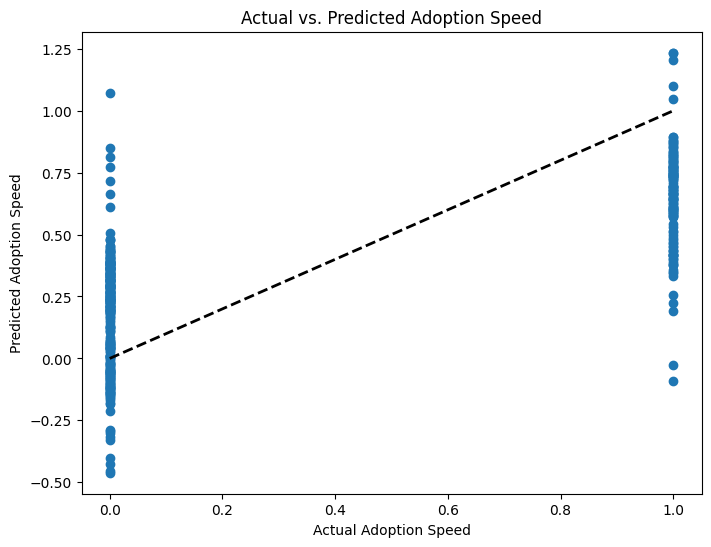

In [67]:
X = df[['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg', 'Vaccinated',
        'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner']]
y = df['AdoptionLikelihood']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['PetType', 'Breed', 'Color', 'Size', 'HealthCondition']) # Convert 'PetType', 'Breed', 'Color', 'Size', 'HealthCondition' to numerical

# 2. Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training:
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Model Prediction:
y_pred = model.predict(X_test)

# 5. Model Evaluation:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

#  Visualization (scatter plot of predicted vs. actual):
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Adoption Speed")
plt.ylabel("Predicted Adoption Speed")
plt.title("Actual vs. Predicted Adoption Speed")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()

####**Interpretation:**
#### - MSE:  the mean squared error here is 0.11, indicating that even though it looks like adoption is less actual than predicted, the opposite is true. When all those factors are put together,chances for adoption are more likely, sure there are factors that could bring the likelihood down, but overall, they're not detrimental.
#### - R2:  the .50 score of the r-squared tells us that there are other factors that might be considered to explain or to add more likelihood for adoption. Those factors are not added to the dataset. All we have are moderate reasons.

####**5. Plot a histogram of the residuals and see if they have a Gaussian distribution.**

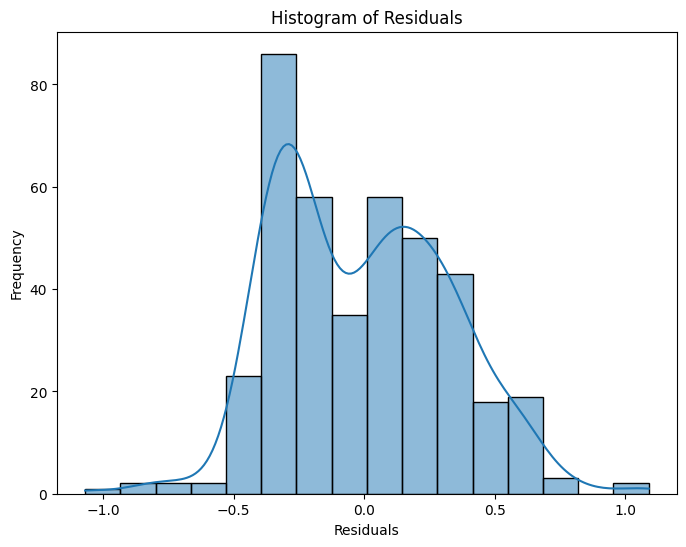

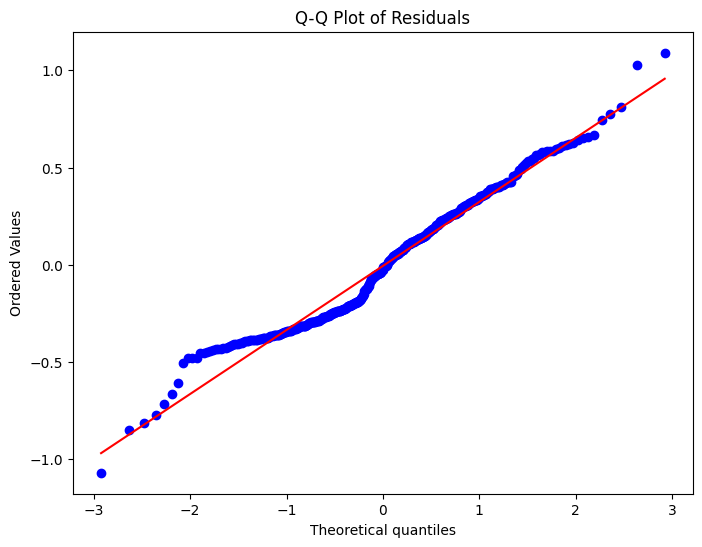

Shapiro-Wilk Test: Statistic = 0.973, p-value = 0.000
Residuals do not appear to be normally distributed (reject H0)


In [68]:
from scipy import stats

# Calculate residuals
residuals = y_test - y_pred

# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # kde=True adds a kernel density estimate curve
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot (for visual normality check)
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Statistical Test for Normality (Shapiro-Wilk test)
statistic, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic = {statistic:.3f}, p-value = {p_value:.3f}')
alpha = 0.05  # Significance level
if p_value > alpha:
    print('Residuals appear to be normally distributed (fail to reject H0)')
else:
    print('Residuals do not appear to be normally distributed (reject H0)')

####No Gaussian distribution is observed by both plots, even though the distributions are very close to normal with a right skew. However, the null is still rejected. Adoption could maybe be affected by the slew of factors that we listed above, but overall, those are not perfect predictors for unlikelihood of adoption.

####**6. Scatterplot of predicted values and residuals to check assumption of homoscedasticity.**

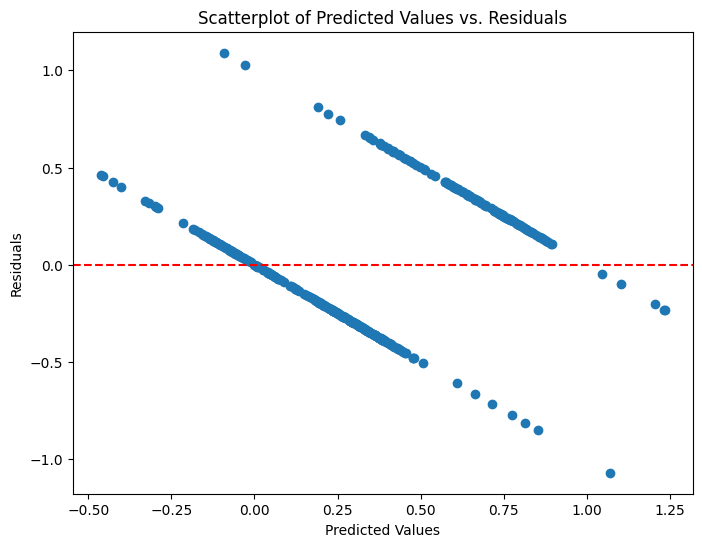

In [69]:
# Let's calculate residuals:
residuals = y_test - y_pred

# Scatterplot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title('Scatterplot of Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

####There is no clear indication of homoscedascity in this graph between the residuals and the predicted values. We instead have heteroscedasticity. This could either mean that as previously stated, we might not have enough factors to determine the right likelihood of adoption. Secondly, those omitted variables could have an even more significant impact. Factors that were not included but that could help would be location of the dog shelters, median income of the areas around the shelters, and even median age of the citizens around the shelters.


In [70]:
#7. Interpret the coefficients
coefficients = model.coef_

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print(coefficients_df)

                   Feature  Coefficient
0                AgeMonths    -0.001502
1                 WeightKg    -0.000722
2               Vaccinated     0.308781
3        TimeInShelterDays     0.000072
4              AdoptionFee    -0.000043
5            PreviousOwner     0.000006
6             PetType_Bird    -0.028255
7              PetType_Cat    -0.034049
8              PetType_Dog     0.093952
9           PetType_Rabbit    -0.031648
10  Breed_Golden Retriever    -0.106280
11          Breed_Labrador     0.270343
12          Breed_Parakeet    -0.028255
13           Breed_Persian    -0.046751
14            Breed_Poodle    -0.070111
15            Breed_Rabbit    -0.031648
16           Breed_Siamese     0.012702
17             Color_Black     0.014666
18             Color_Brown    -0.012160
19              Color_Gray    -0.006959
20            Color_Orange     0.012185
21             Color_White    -0.007731
22              Size_Large    -0.160526
23             Size_Medium     0.291418


####**Interpretration of the Coefficients(as they affect the likelihood of adoption), from negative:**
- Age of the pet negatively affects adoption, the older a pet is, the less likely they'd be adopted.
- Adoption fee is also detrimental, as it could be discouraging for people who can't afford it.
-Health is another negative factor, as an older/sick pet could be too taxing for some owners.
-Certain breeds are not flying out of the shelters, as people can be picky about adopting them.
-Certain colors also negatively affect the likelihood of adoption. some people might want a pet that matches their favorite color.
-Outside of dogs, other pets are not as popular for adoption.
####**to positive:**
-Dogs are likely to be adopted as they have a positive relationship with likelihood of adoption, especially the Labrador Retriever.
-Healthy pets are also more likely to be adopted.
-Medium pets are seen as more favorable.
-Siamese cats are popular and likely to be the most adopted cat breed.
-a Vaccinated pet would also be considered better for adoption.
-Certain colors(black and orange) display a positive relationship with adoption.


###**Conclusion**
####Given what we got as a dataset, the conclusion would be that adoption is more positive than negative, and pets across the board are being scooped up to homes on a regular basis. Dogs are more likely to be adopted, maybe because there are more ads and publicity for them. Sure, factors like the age of the pet, their fee, vaccination status, and their health condition might be factors that could discourage people who want to adopt, but the data shows that for the hundreds of those we have in shelters, some,if not most of those hundreds are given new homes.

#####Dedicated to my dog, Weezer.